In [1]:
import face_recognition
from PIL import Image
import os

In [2]:
!pip install Pillow

In [3]:
!pip install git+https://github.com/ageitgey/face_recognition_models


  Cloning https://github.com/ageitgey/face_recognition_models to /private/var/folders/cb/2k_t4xvj4rx5f3kbh__v40000000gn/T/pip-req-build-ibidyf_n
  Running command git clone -q https://github.com/ageitgey/face_recognition_models /private/var/folders/cb/2k_t4xvj4rx5f3kbh__v40000000gn/T/pip-req-build-ibidyf_n
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=902e81051fb82208626a6967396eeb66bb4ddf52cb7fcbc311dc064c72a41db0
  Stored in directory: /private/var/folders/cb/2k_t4xvj4rx5f3kbh__v40000000gn/T/pip-ephem-wheel-cache-rze9tgu6/wheels/68/91/74/d9eed76c1b660baa77ca19a7b823791fda1a13af77926833ef
Successfully built face-recognition-models


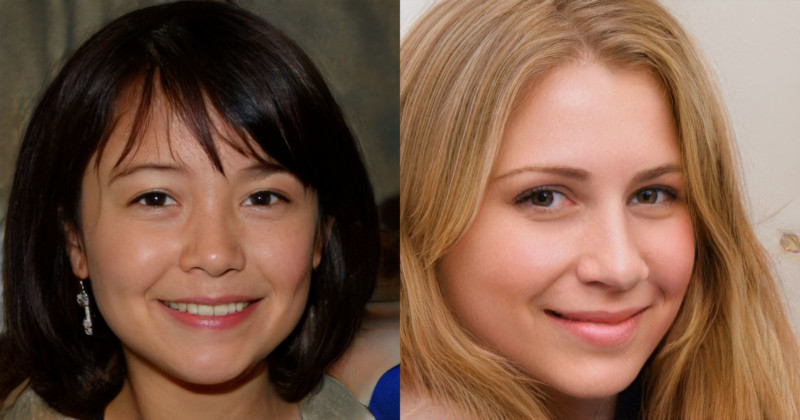

In [4]:
#display test image

im = Image.open("test.jpg")
im

In [5]:
image = face_recognition.load_image_file("test.jpg")

In [6]:
face_locations = face_recognition.face_locations(image)
face_locations

[(112, 735, 379, 468), (142, 315, 365, 92)]

In [7]:
# function to re-arrange pixel edges to correcrt croping format

def coords(coord_list):
    output = []
    for tup in coord_list:
        output.append((tup[3],tup[0],tup[1],tup[2]))
        
    return output

In [8]:
# Extracts faces from main image and stores them in sub-image folder
# need to adress resize

def face_extract(edge_list, image_path):
    path = "sub_images"
    try:
        os.mkdir(path)
    except FileExistsError:
        pass
        
    img = Image.open(image_path)
    
    for i in edge_list:
        print(i)
        num = 1
        name = "sub_" + str(num) + ".jpg"
        sub = img.crop((i[0],i[1],i[2],i[3])).save("sub_images/" + name)
        num +=1
    
    return "Extraction Complete!"

In [9]:
face_extract(coords(face_locations), "test.jpg")

(468, 112, 735, 379)
(92, 142, 315, 365)


'Extraction Complete!'

In [10]:
face_locations

[(112, 735, 379, 468), (142, 315, 365, 92)]

In [11]:
im1 = im.crop((468, 112, 735, 379))

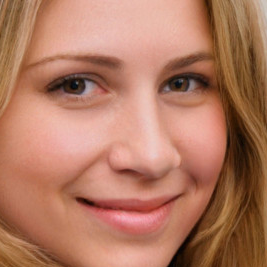

In [12]:
im1

In [13]:
cd /Users/Eliya/Desktop/data-x/eliya_data_x_s20/Emopy/Emopy/examples

/Users/Eliya/Desktop/data-x/eliya_data_x_s20/EmoPy/EmoPy/examples


In [14]:
from EmoPy.src.fermodel import FERModel

Using TensorFlow backend.


In [15]:
from pkg_resources import resource_filename

target_emotions = ['calm', 'anger', 'happiness']
model = FERModel(target_emotions, verbose=True)

print('Predicting on happy image...')
model.predict(resource_filename('EmoPy.examples','image_data/sample_happy_image.png'))

print('Predicting on disgust image...')
model.predict(resource_filename('EmoPy.examples','image_data/sample_disgust_image.png'))

print('Predicting on anger image...')
model.predict(resource_filename('EmoPy.examples','image_data/sample_anger_image2.png'))

Initializing FER model parameters for target emotions: ['calm', 'anger', 'happiness']


AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'experimental_list_devices'